In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {  
    "distance_km": ["50km", "100km", "150km", "200km", "250km", "300km", "350km", "400km", "450km", "500km"],  
    "fuel_liters": ["2.5lt", "5lt", "7.5lt", "10lt", "12.5lt", "", "17.5lt", "", "22.5lt", "25lt"]  
} 

In [3]:
df = pd.DataFrame(data)

In [4]:
df["distance_km"] = df["distance_km"].str.replace("km", "").astype(float)  
df["fuel_liters"] = df["fuel_liters"].str.replace("lt", "").replace("", np.nan).astype(float)   
df = df.dropna()   
print("Cleaned Data:")  
print(df)  

Cleaned Data:
   distance_km  fuel_liters
0         50.0          2.5
1        100.0          5.0
2        150.0          7.5
3        200.0         10.0
4        250.0         12.5
6        350.0         17.5
8        450.0         22.5
9        500.0         25.0


In [5]:
from sklearn.linear_model import LinearRegression

In [9]:
print(X)

[[ 50.]
 [100.]
 [150.]
 [200.]
 [250.]
 [350.]
 [450.]
 [500.]]


In [11]:
print(len(X))

8


In [35]:
X = df[["distance_km"]].values  
y = df["fuel_liters"].values

model = LinearRegression()  
model.fit(X, y)  
  
new_distance = pd.DataFrame({"distance_km": [300]})  
predicted_fuel = model.predict(new_distance)[0]  
print(f"\nPredicted fuel consumption for 300 km: {predicted_fuel:.2f} liters")  


Predicted fuel consumption for 300 km: 15.00 liters


In [12]:
def compute_loss(weight,bias,features,actual_value):
    predictions = weight*features +bias
    return np.mean((actual_value-predictions)**2)

In [13]:
def gradient_descent_step(weight, bias,features,actual_value, learning_rate=0.0001):
    m = len(features)
    predictions = weight*features +bias
    loss =  actual_value - predictions

    ##compute gradients
    gradient_weight = (2/m) * np.sum(loss * features)
    gradient_bias = (2/m) * np.sum(loss)

    weight -= learning_rate * gradient_weight
    bias -= learning_rate * gradient_bias
    return weight, bias


In [31]:
np.random.seed(42)
weight = np.random.rand()
bias = np.random.rand()


loss_history =[]
iterations = 70
learning_rate = 0.0001

for _ in range(iterations):
    weight,bias = gradient_descent_step(weight,bias,X,y, learning_rate)
    loss = compute_loss(weight, bias, X,y)
    loss_history.append(loss)

In [32]:
print(f"loss hoistory is  {loss_history}")

loss hoistory is  [212527012.911026, 4376479368657.5537, 9.01230389855162e+16, 1.8558666617577464e+21, 3.8217098590931615e+25, 7.869889873045408e+29, 1.6206140418142313e+34, 3.337263818037552e+38, 6.872290072665704e+42, 1.4151824194298131e+47, 2.9142269303053066e+51, 6.001147615116969e+55, 1.23579163736062e+60, 2.544814873614263e+64, 5.240432565800387e+68, 1.07914071712801e+73, 2.2222300787982605e+77, 4.576146970210123e+81, 9.423471175535457e+85, 1.9405366474073286e+90, 3.996067276893754e+94, 8.228936929790014e+98, 1.6945511249524999e+103, 3.4895194112893253e+107, 7.185823751470656e+111, 1.4797471199084432e+116, 3.0471823615618125e+120, 6.274937264407679e+124, 1.2921720133635464e+129, 2.660916662212418e+133, 5.479516202188181e+137, 1.1283742266876728e+142, 2.323614619379269e+146, 4.7849239832801736e+150, 9.853397088664433e+154, 2.029069521818061e+159, 4.1783793825861387e+163, 8.604364748023844e+167, 1.7718614309075172e+172, 3.6487213435003186e+176, 7.513661740295339e+180, 1.54725744809

In [33]:
import matplotlib.pyplot as plt

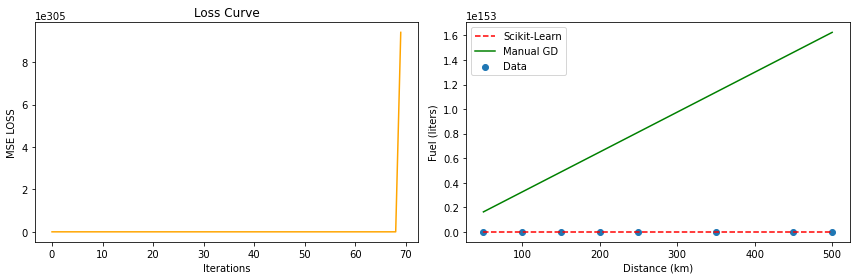

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iterations), loss_history, color='orange')
plt.title('Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")

plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), 'r--', label="Scikit-Learn")
plt.plot(X, weight * X + bias, 'g-', label="Manual GD")
plt.title("")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel (liters)")
plt.legend()

plt.tight_layout()




plt.show()